# Modelo Aula 17 

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy 
from sklearn import datasets, linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as ps
import os
import seaborn as sns
import matplotlib as plt

In [85]:
def LinearReg(X_train,
              X_test,
              Y_train,
              Y_test):
    result={}
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, Y_train)
    
    beta=regr.coef_
    
    intercepto=regr.intercept_
    
    result['Beta'] = beta
    result['Intercepto'] = intercepto
    
    # R quadrado da amostra de treinamento
    result['Score Train'] = regr.score(X_train,Y_train)
    
    #R quadrado da amostra de teste
    result['Score Test'] = regr.score(X_test, Y_test)
    
    return result

In [86]:
filename = os.path.join('..','data','Video_Games_Sales_as_at_22_Dec_2016.csv')
Games = pd.read_csv(filename)

In [87]:
Games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
Games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [89]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


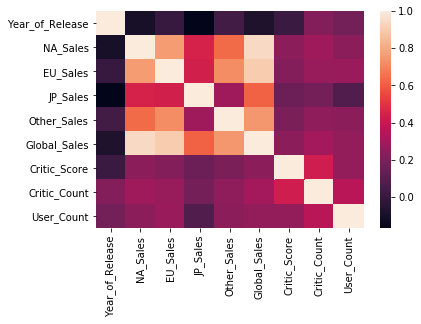

In [90]:
sns.heatmap(Games.corr())

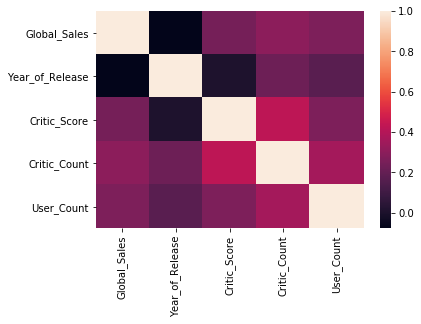

In [91]:
sns.heatmap(Games[['Global_Sales','Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count','Rating']].corr())

In [92]:
Games_Genre = Games.join(pd.get_dummies(Games['Genre'], prefix='Genre'))

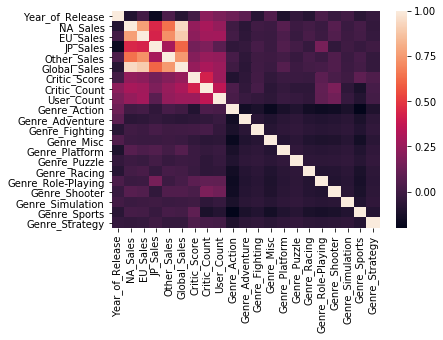

In [93]:
sns.heatmap(Games_Genre.corr())

In [94]:
Games_Publisher = Games.join(pd.get_dummies(Games['Publisher'], prefix='Publisher'))

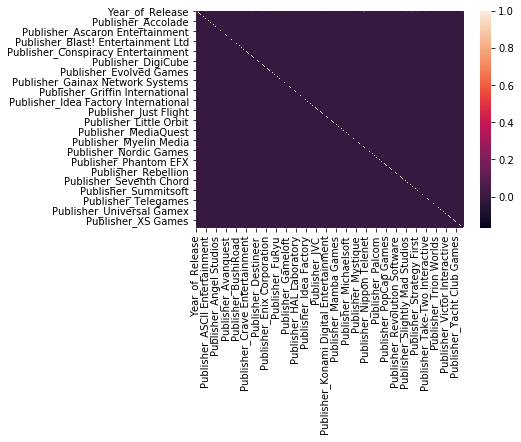

In [95]:
sns.heatmap(Games_Publisher.corr())

In [96]:
Games_Platform = Games.join(pd.get_dummies(Games['Platform'], prefix='Platform'))
Games_Platform.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,0,0,0,0,0,0


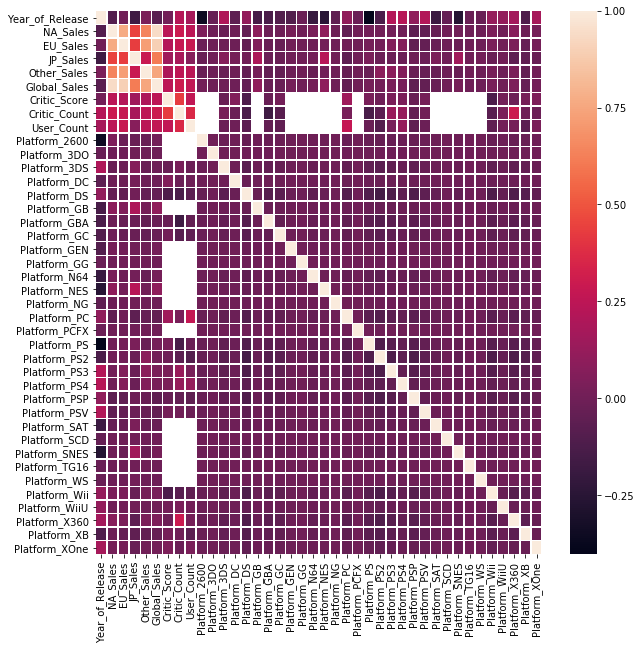

In [128]:
fig, ax = plt.pyplot.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(Games_Platform.corr(), linewidths=.5, ax=ax)

In [201]:
from sklearn.model_selection import train_test_split
def linear_reg(X,Y,random_state=101):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=random_state)
    return LinearReg(X_train, X_test, Y_train, Y_test)

In [407]:
Games_Plataform_X = pd.get_dummies(Games['Platform'], prefix='Platform')
linear_reg(
    Games_Plataform_X,
    Games['Global_Sales']
)

{'Beta': array([ 1.2130125e+13,  1.2130125e+13,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.5625000e-02,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13, -6.8359375e-03,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13,  1.2130125e+13,  1.2130125e+13,
         1.2130125e+13,  1.2130125e+13,  1.2130125e+13]),
 'Intercepto': -12130124996822.979,
 'Score Test': -1.3699190005387126e+22,
 'Score Train': 0.05579010226861691}

## Criando uma tabela sem na

In [408]:
Games_Clean = Games.dropna()
Games_Clean = Games_Clean[Games_Clean['User_Score']!='tbd']

### Year of Release com Global Sales

In [409]:
X = Games_Clean['Year_of_Release']
Y = Games_Clean['Global_Sales']
linear_reg(X.values.reshape(len(X),1), Y, None)

{'Beta': array([0.00526758]),
 'Intercepto': -9.789934877026905,
 'Score Test': -0.00016590853903308833,
 'Score Train': 0.00010223166827327823}

### Testando variaveis númericas

In [380]:
columns = ['Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count']
check_variables = {}
for column in columns:
    X = Games_Clean[column]
    Y = Games_Clean['Global_Sales']
    check_variables[column] = linear_reg(X.values.reshape(len(X),1), Y, None)

In [381]:
check_variables

{'Critic_Count': {'Beta': array([0.02946342]),
  'Intercepto': -0.07140377506130025,
  'Score Test': 0.06814411511548624,
  'Score Train': 0.11190083034483657},
 'Critic_Score': {'Beta': array([0.03671672]),
  'Intercepto': -1.7839958241176332,
  'Score Test': 0.043090904501002725,
  'Score Train': 0.06969502000948369},
 'User_Count': {'Beta': array([0.00084848]),
  'Intercepto': 0.6816222689521924,
  'Score Test': 0.11341767566561645,
  'Score Train': 0.04937513548809436},
 'User_Score': {'Beta': array([0.11103906]),
  'Intercepto': -0.022872517852316365,
  'Score Test': 0.010419777999313595,
  'Score Train': 0.005834476278917755},
 'Year_of_Release': {'Beta': array([-0.00221603]),
  'Intercepto': 5.2491744998592385,
  'Score Test': -0.0010010814504135546,
  'Score Train': 1.7979508785459508e-05}}

In [382]:
X = Games_Clean[columns]
Y = Games_Clean['Global_Sales']
res = linear_reg(X, Y, None)
print(res)
df = pd.DataFrame(res['Beta'],columns=['beta'])
df['columns'] = columns
df.head()

{'Beta': array([-0.03505727,  0.02265694,  0.0198777 , -0.09632389,  0.00059495]), 'Intercepto': 69.5660392469241, 'Score Train': 0.19661784392478643, 'Score Test': 0.09123916331212811}


,beta,columns
0,-0.035057,Year_of_Release
1,0.022657,Critic_Score
2,0.019878,Critic_Count
3,-0.096324,User_Score
4,0.000595,User_Count


In [383]:
columns2 = ['Year_of_Release','Critic_Score','Critic_Count','User_Score']
X = Games_Clean[columns2]
Y = Games_Clean['Global_Sales']
res = linear_reg(X, Y, None)
print(res)
df = pd.DataFrame(res['Beta'],columns=['beta'])
df['columns'] = columns2
df.head()

{'Beta': array([-0.02094379,  0.02480434,  0.02431287, -0.08494364]), 'Intercepto': 40.96487595941737, 'Score Train': 0.1267379806201404, 'Score Test': 0.09428350505039673}


,beta,columns
0,-0.020944,Year_of_Release
1,0.024804,Critic_Score
2,0.024313,Critic_Count
3,-0.084944,User_Score


In [384]:
columns3 = ['Critic_Score','Critic_Count']
X = Games_Clean[columns3]
Y = Games_Clean['Global_Sales']
res = linear_reg(X, Y, None)
print(res)
df = pd.DataFrame(res['Beta'],columns=['beta'])
df['columns'] = columns3
df.head()

{'Beta': array([0.02199639, 0.01871961]), 'Intercepto': -1.3352513889920143, 'Score Train': 0.11644290905117449, 'Score Test': 0.09096259817046937}


,beta,columns
0,0.021996,Critic_Score
1,0.018720,Critic_Count


In [385]:
Games_Platform_Columns = list(pd.get_dummies(Games['Platform'], prefix='Platform').columns)
Games_Platform_Clean = Games_Platform.dropna()
columns3 = columns + Games_Platform_Columns
X = Games_Platform_Clean[columns3]
Y = Games_Platform_Clean['Global_Sales']
res3 = linear_reg(X, Y)
print(res)
df3 = pd.DataFrame(res3['Beta'],columns=['beta'])
df3['variable'] = columns3
df3['beta_mod'] = df3['beta'].apply(abs)
df3.sort_values(by='beta_mod',ascending=False)

{'Beta': array([0.02199639, 0.01871961]), 'Intercepto': -1.3352513889920143, 'Score Train': 0.11644290905117449, 'Score Test': 0.09096259817046937}


,beta,variable,beta_mod
18,-1.077140e+00,Platform_PC,1.077140e+00
31,9.254144e-01,Platform_Wii,9.254144e-01
20,9.101092e-01,Platform_PS,9.101092e-01
8,-7.192585e-01,Platform_DC,7.192585e-01
9,4.519107e-01,Platform_DS,4.519107e-01
34,-3.952934e-01,Platform_XB,3.952934e-01
21,2.716447e-01,Platform_PS2,2.716447e-01
25,-2.466582e-01,Platform_PSV,2.466582e-01
12,-2.110480e-01,Platform_GC,2.110480e-01
23,-2.106105e-01,Platform_PS4,2.106105e-01


In [386]:
Platforms = Games['Platform'].value_counts().reset_index()
Platforms.columns = ['Platform','games']
Platforms.head()

,Platform,games
0,PS2,2161
1,DS,2152
2,PS3,1331
3,Wii,1320
4,X360,1262


In [387]:
df3['Platform'] = df3['variable'].apply(lambda x: x.replace('Platform_',''))
df3.head(10)

,beta,variable,beta_mod,Platform
0,-2.939337e-02,Year_of_Release,2.939337e-02,Year_of_Release
1,2.876664e-02,Critic_Score,2.876664e-02,Critic_Score
2,1.927430e-02,Critic_Count,1.927430e-02,Critic_Count
3,-1.199572e-01,User_Score,1.199572e-01,User_Score
4,9.197561e-04,User_Count,9.197561e-04,User_Count
5,9.436896e-16,Platform_2600,9.436896e-16,2600
6,-6.383782e-16,Platform_3DO,6.383782e-16,3DO
7,1.052574e-01,Platform_3DS,1.052574e-01,3DS
8,-7.192585e-01,Platform_DC,7.192585e-01,DC
9,4.519107e-01,Platform_DS,4.519107e-01,DS


In [388]:
df4 = pd.merge(Platforms,df3, on='Platform')
df4.head()

,Platform,games,beta,variable,beta_mod
0,PS2,2161,0.271645,Platform_PS2,0.271645
1,DS,2152,0.451911,Platform_DS,0.451911
2,PS3,1331,0.090177,Platform_PS3,0.090177
3,Wii,1320,0.925414,Platform_Wii,0.925414
4,X360,1262,0.066243,Platform_X360,0.066243


In [389]:
df4[['games','beta_mod']].corr()

,games,beta_mod
games,1.000000,0.494972
beta_mod,0.494972,1.000000


In [390]:
platforms = list(Games.Platform.unique())
columns4 = ['Critic_Score','Critic_Count','User_Score']
check_variables = {}
for platform in platforms:
    mask = (Games_Clean['Platform']==platform)
    X = Games_Clean[mask][columns4]
    Y = Games_Clean[mask]['Global_Sales']
    if len(X) > 0:
        check_variables[platform] = linear_reg(X, Y)

In [391]:
results_platforms = pd.DataFrame(check_variables)
results_platforms.head()

,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Beta,"[0.010656835633772095, 0.02935225930351357, -0...","[0.01607209063145766, -0.021349907224595996, -...","[0.025731258598162124, 0.060777611842502965, -...","[0.011428744950135489, 0.014371980770127846, 0...","[0.0042099602124720135, 0.028174731167933672, ...","[0.01694003922694002, 0.007528036572058555, -0...","[0.029849574340875974, 0.1462205634008977, 0.0...","[0.03894470942382183, 0.020171794511177843, -0...","[0.05537985641852318, 0.018755218785272323, -0...","[0.0668903586830061, 0.02652178076523084, -0.3...","[0.014237821708599137, 0.018602429203185222, -...","[0.004839703657385712, 0.007949180961400234, -...","[0.029501202986265157, 0.1068547553917299, -0....","[0.017566197374969568, 0.02299688549044702, -0...","[0.04180725763774233, 0.026050298737866847, -0...","[0.01283083069977401, 0.009353120031410079, -0...","[0.045054328212253615, 0.014228195103811337, -..."
Intercepto,-0.424897,1.58127,-0.773268,-0.605255,-0.531611,-0.603548,-2.61714,-1.56798,-1.66187,-2.2811,-0.757976,-0.230347,-0.932119,-1.17474,-1.4461,-0.71889,-0.858023
Score Test,0.255758,-0.48584,0.00595648,0.052926,0.293792,0.147586,0.3946,0.185828,0.275546,0.390986,0.0429485,0.317781,0.0891309,0.30355,0.207665,0.221446,0.335139
Score Train,0.226979,0.902574,0.14363,0.103766,0.269218,0.122565,0.272221,0.201909,0.249805,0.355223,0.209437,0.456797,0.0798934,0.373674,0.280835,0.215608,0.396925


In [392]:
results_plataforms.loc[['Score Train']].pivot_table()

ValueError: No group keys passed!

In [393]:
Games.head()
Games['age'] = 2018 - Games['Year_of_Release']

In [394]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
age                16450 non-null float64
dtypes: float64(10), object(7)
memory usage: 2.2+ MB


In [395]:
Games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,age
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,16450.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908,11.512644
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326,5.878995
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000,8.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000,11.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000,15.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000,38.000000


In [396]:
Games[(Games['Critic_Score'].isnull())].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,age
count,8467.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,0.0,0.0,573.000000,8467.000000
mean,2005.822251,0.178329,0.085020,0.099006,0.023531,0.386113,NaN,NaN,25.040140,12.177749
std,7.049381,0.715910,0.320966,0.343861,0.088721,1.222417,NaN,NaN,70.626221,7.049381
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,NaN,NaN,4.000000,-2.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,0.040000,NaN,NaN,6.000000,7.000000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,0.120000,NaN,NaN,9.000000,10.000000
75%,2011.000000,0.140000,0.050000,0.060000,0.020000,0.320000,NaN,NaN,18.000000,17.000000
max,2020.000000,29.080000,10.950000,10.220000,2.740000,40.240000,NaN,NaN,1273.000000,38.000000


In [397]:
Games[(Games['Critic_Score'].isnull()==False)].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,age
count,7983.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,7017.000000,7983.000000
mean,2007.192785,0.352980,0.208311,0.055028,0.072435,0.689035,68.967679,26.360821,173.432664,10.807215
std,4.189425,0.896476,0.635622,0.265075,0.249204,1.816704,13.938165,18.980495,581.977516,4.189425
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,2.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.090000,60.000000,12.000000,11.000000,8.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,21.000000,27.000000,11.000000
75%,2010.000000,0.340000,0.180000,0.010000,0.060000,0.650000,79.000000,36.000000,89.000000,14.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000,33.000000


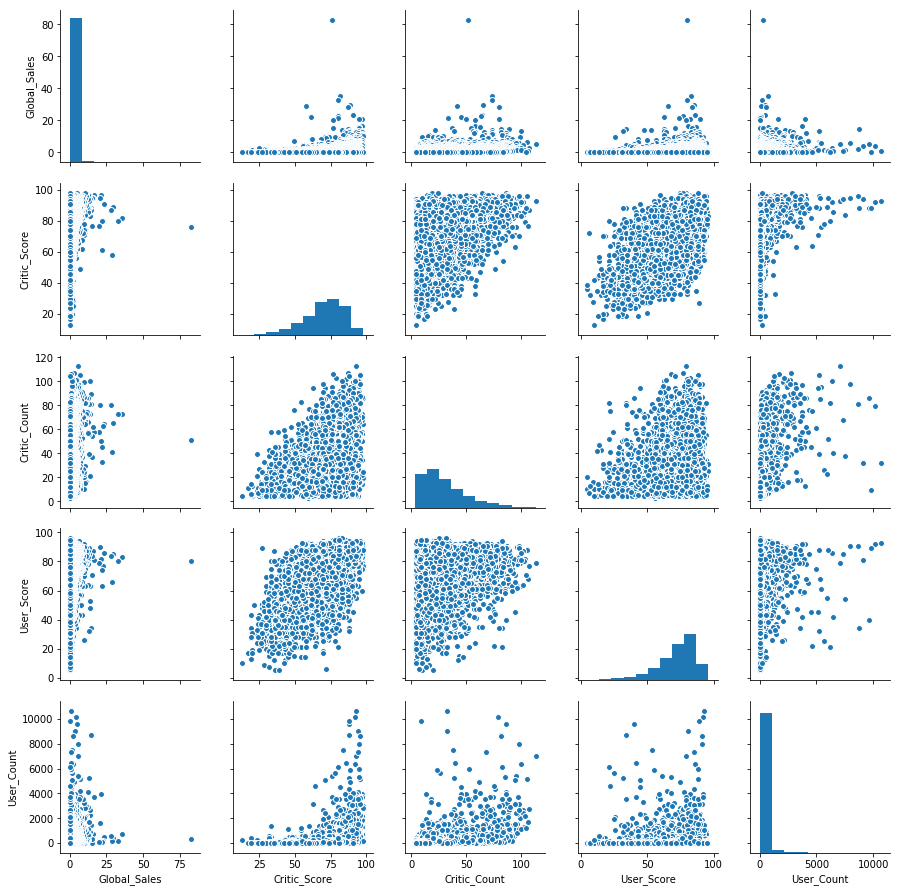

In [412]:
Games_Clean['User_Score'] = pd.to_numeric(Games_Clean['User_Score']) * 10
sns.pairplot(Games_Clean[['Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']])

In [401]:
Games_Clean.sort_values(by=['User_Score'])['User_Score'].unique()

array(['0.5', '0.6', '0.7', '0.9', '1', '1.2', '1.3', '1.4', '1.5', '1.7',
       '1.8', '1.9', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7',
       '2.8', '2.9', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7',
       '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7',
       '6.8', '6.9', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7',
       '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7',
       '8.8', '8.9', '9', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6'],
      dtype=object)

In [404]:
Games_Clean[(Games_Clean['Global_Sales']>=50)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,age
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8888888888,322.0,Nintendo,E,12.0
